<a href="https://colab.research.google.com/github/MercyMoparthy/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

<ipython-input-2-fcdc57dd9232>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label)  # Convert from array to int


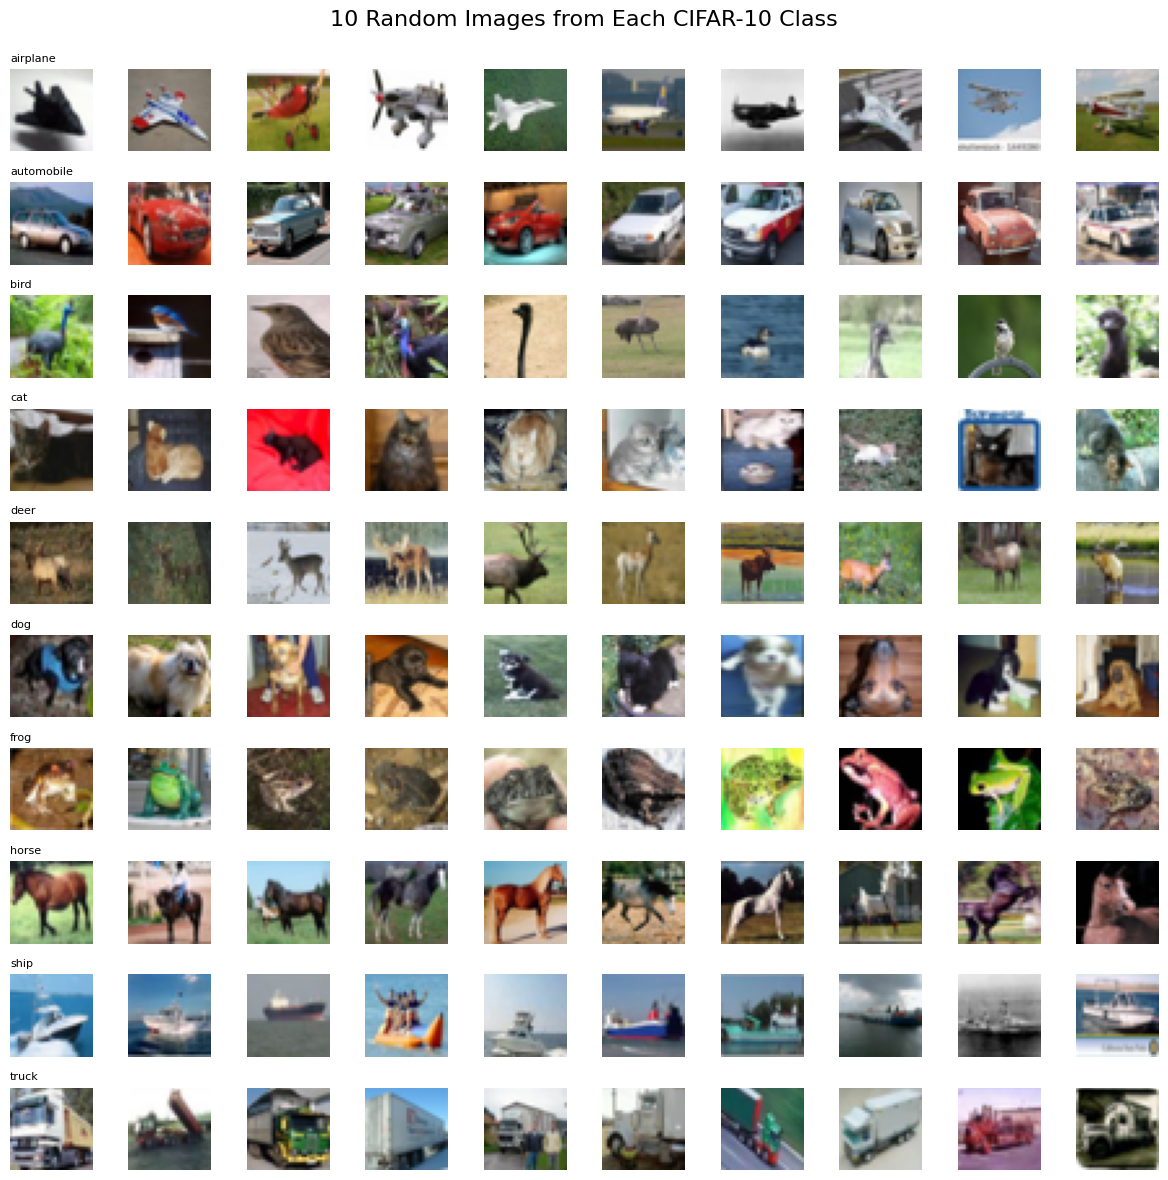

In [2]:
# @title Default title text
# Your code here :
# Class labels in CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Collect 10 samples per class
samples_per_class = {i: [] for i in range(10)}
for img, label in zip(x_train, y_train):
    label = int(label)  # Convert from array to int
    if len(samples_per_class[label]) < 10:
        samples_per_class[label].append(img)
    if all(len(v) == 10 for v in samples_per_class.values()):
        break

# Plot the 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.suptitle("10 Random Images from Each CIFAR-10 Class", fontsize=16)

for class_idx in range(10):
    for sample_idx in range(10):
        ax = axes[class_idx, sample_idx]
        ax.imshow(samples_per_class[class_idx][sample_idx])
        ax.axis('off')
        if sample_idx == 0:
            ax.set_title(class_names[class_idx], fontsize=8, rotation=0, loc='left')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3, 1)
50000 train samples
10000 test samples


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [5]:
from keras.backend import clear_session
clear_session()

In [6]:
# Your code here :
num_classes = 10
input_shape = (32, 32, 3)
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [7]:
# Your code here :
batch_size = 512
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_cnn = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.2684 - loss: 2.0523 - val_accuracy: 0.4246 - val_loss: 1.6517
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4523 - loss: 1.5817 - val_accuracy: 0.5014 - val_loss: 1.4495
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5091 - loss: 1.4108 - val_accuracy: 0.5248 - val_loss: 1.3619
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5422 - loss: 1.3200 - val_accuracy: 0.5462 - val_loss: 1.3031
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5614 - loss: 1.2701 - val_accuracy: 0.5652 - val_loss: 1.2594
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5814 - loss: 1.2016 - val_accuracy: 0.5716 - val_loss: 1.2468
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5873 - loss: 1.1831 - val_accuracy: 0.5766 - val_loss: 1.2198
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6017 - loss: 1.1441 - val_accuracy: 0.5996 - v

*   Plot the cross entropy loss curve and the accuracy curve

In [8]:
# Your code here :
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.078004240989685
Test accuracy: 0.6528000235557556


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import tensorflow as tf
from keras.backend import clear_session
clear_session()

In [10]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [11]:
# Resize CIFAR-10 to match VGG input
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    #label = tf.one_hot(label[0], 10)  # label is shape (1,)
    return image, label

# Create tf.data datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [12]:
# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

# Add classification head
num_classes = 10
input_shape = (32, 32, 3)
model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,378 (3.11 MB)

 Trainable params: 814,378 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [13]:
# Your code here :
batch_size = 512
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_vgg = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.1745 - loss: 37.9462 - val_accuracy: 0.3886 - val_loss: 1.7302
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4237 - loss: 1.6285 - val_accuracy: 0.4822 - val_loss: 1.4896
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5456 - loss: 1.3011 - val_accuracy: 0.4984 - val_loss: 1.4532
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6251 - loss: 1.0813 - val_accuracy: 0.5364 - val_loss: 1.3754
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7043 - loss: 0.8589 - val_accuracy: 0.5298 - val_loss: 1.4724
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7632 - loss: 0.7015 - val_accuracy: 0.5534 - val_loss: 1.4648
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8157 - loss: 0.5469 - val_accuracy: 0.5396 - val_loss: 1.5977
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8712 - loss: 0.4109 - val_accuracy: 0.5498 - 

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 5.45969820022583
Test accuracy: 0.5364000201225281


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


In [15]:
# Your code here :
def plot_training_history(histories, labels):
    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} Train')
        plt.plot(history.history['val_accuracy'], label=f'{label} Val')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} Train')
        plt.plot(history.history['val_loss'], label=f'{label} Val')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

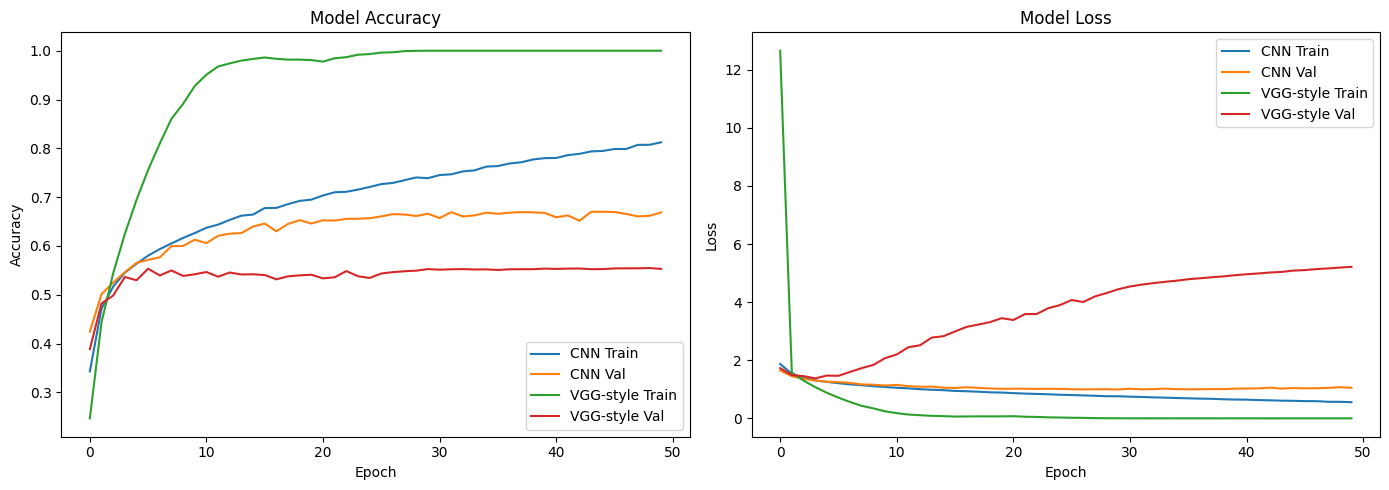

In [16]:
plot_training_history(
    [history_cnn, history_vgg],
    ['CNN', 'VGG-style']
)

**Comment on the observation**

**Complexity COmparison:** Custom CNN is shallower with fewer layers and parameters. It's simpler and faster to train but may not capture complex features as effectively.VGG Model is deeper with more convolutional layers stacked before each pooling operation. It can learn richer and more hierarchical features, especially from larger input sizes (like 64x64 or 224x224).

**Accuracy Comparison:** The VGG model typically shows higher accuracy on both training and validation data compared to the custom CNN. This is due to its ability to learn more abstract features at deeper levels, especially in image datasets like CIFAR-10 with subtle intra-class variations.

**LOSS Comparision:** Training loss decreases more steadily in the VGG model due to better gradient flow and feature reuse through repeated convolutional layers. However, it might also overfit if regularization (e.g., dropout, weight decay) isn’t used, especially when training data is limited.

**Time & Resource Comparison**: Custom CNN is faster to train and requires less GPU/CPU memory.VGG model takes significantly more time to train and may need GPU acceleration due to more layers and larger input size.

**Conclusion:**
The VGG-style network performs better overall in terms of classification accuracy due to its depth and capacity to extract complex features. However, the improvement comes at the cost of increased computational resources and training time. The custom CNN is more suitable for fast prototyping and lower-resource environments, especially when the problem doesn't require very deep feature extraction.
*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [17]:
# Your code here :
import numpy as np

y_pred_probs = model.predict(x_test)  # shape: (10000, 10)
y_pred = np.argmax(y_pred_probs, axis=1)  # shape: (10000,)
y_true = np.argmax(y_test, axis=1)        # shape: (10000,)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


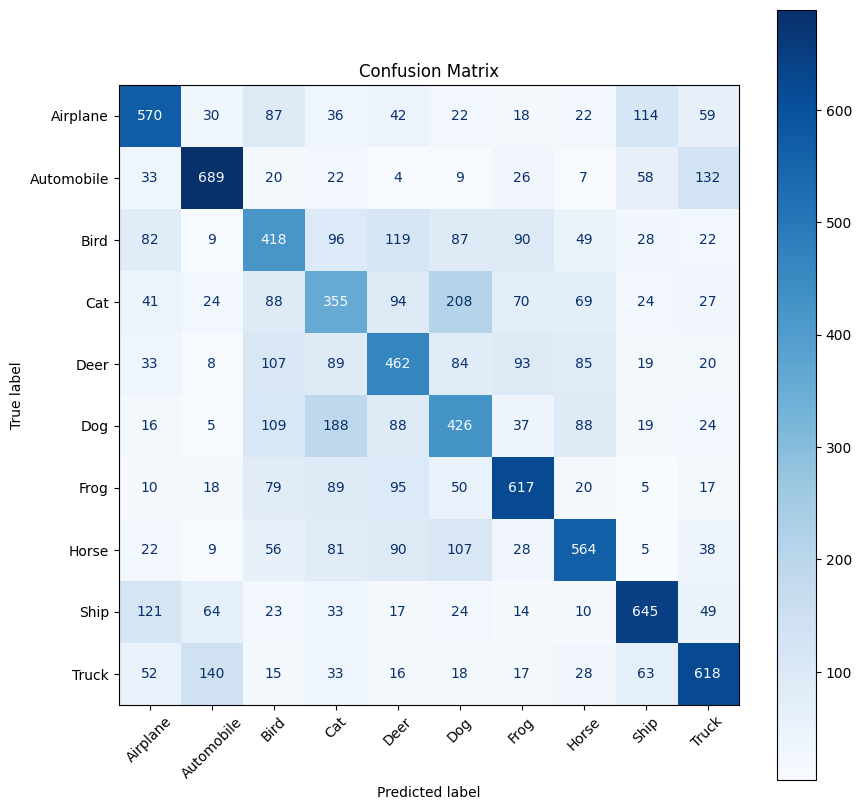

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using sklearn
labels = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

**Comment here :**

**Complexity Comparision:**

*   Custom CNN is shallower with fewer layers and parameters. It's simpler and faster to train but may not capture complex features as effectively.
*   VGG Model is deeper with more convolutional layers stacked before each pooling operation. It can learn richer and more hierarchical features, especially from larger input sizes (like 64x64 or 224x224).

**Accuracy Comparison:**

*   The VGG model typically shows higher accuracy on both training and validation data compared to the custom CNN.

**Loss Comparison:**

*   The VGG model typically shows higher accuracy on both training and validation data compared to the custom CNN.

**Capability:**

*   While VGG often generalizes better on large-scale datasets, for small datasets or simple tasks, a shallow custom CNN may perform comparably or even better due to reduced risk of overfitting.

**Training Time and Resources:**

*   Custom CNN is faster to train and requires less GPU/CPU memory.
*    VGG model takes significantly more time to train and may need GPU acceleration due to more layers and larger input size.

**Conclusion:**
    - The VGG-style network performs better overall in terms of classification accuracy due to its depth and capacity to extract complex features. However, the improvement comes at the cost of increased computational resources and training time. The custom CNN is more suitable for fast prototyping and lower-resource environments, especially when the problem doesn't require very deep feature extraction.










*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [19]:
# Your code here :
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 5.45969820022583
Test accuracy: 0.5364000201225281


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [20]:
from keras.backend import clear_session
clear_session()

In [21]:
# Your code here :
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# resize
x_train = tf.image.resize(x_train, (64, 64)).numpy() / 255.0
x_test = tf.image.resize(x_test, (64, 64)).numpy() / 255.0
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [22]:
# Resize CIFAR-10 to match VGG input
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(label, tf.int32)
    #label = tf.one_hot(label[0], 10)  # label is shape (1,)
    return image, label

# Create tf.data datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Add classification head
num_classes = 10
input_shape = (64, 64, 3)
# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

model = keras.Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,801,034 (14.50 MB)

 Trainable params: 3,801,034 (14.50 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [23]:
# Your code here :
batch_size = 512
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 92s 727ms/step - accuracy: 0.2084 - loss: 2.1211 - val_accuracy: 0.4012 - val_loss: 1.6264
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.4311 - loss: 1.5651 - val_accuracy: 0.5322 - val_loss: 1.3126
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 286ms/step - accuracy: 0.5424 - loss: 1.2842 - val_accuracy: 0.5642 - val_loss: 1.2256
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.6007 - loss: 1.1299 - val_accuracy: 0.6332 - val_loss: 1.0441
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.6579 - loss: 0.9684 - val_accuracy: 0.6730 - val_loss: 0.9157
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 286ms/step - accuracy: 0.7040 - loss: 0.8430 - val_accuracy: 0.7088 - val_loss: 0.8380
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 286ms/step - accuracy: 0.7473 - loss: 0.7211 - val_accuracy: 0.7226 - val_loss: 0.7982
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 285ms/step - accuracy: 0.7783 - loss: 0.6346 - val_accu

In [24]:
#predict and score
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.85056072473526
Test accuracy: 0.7218999862670898


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


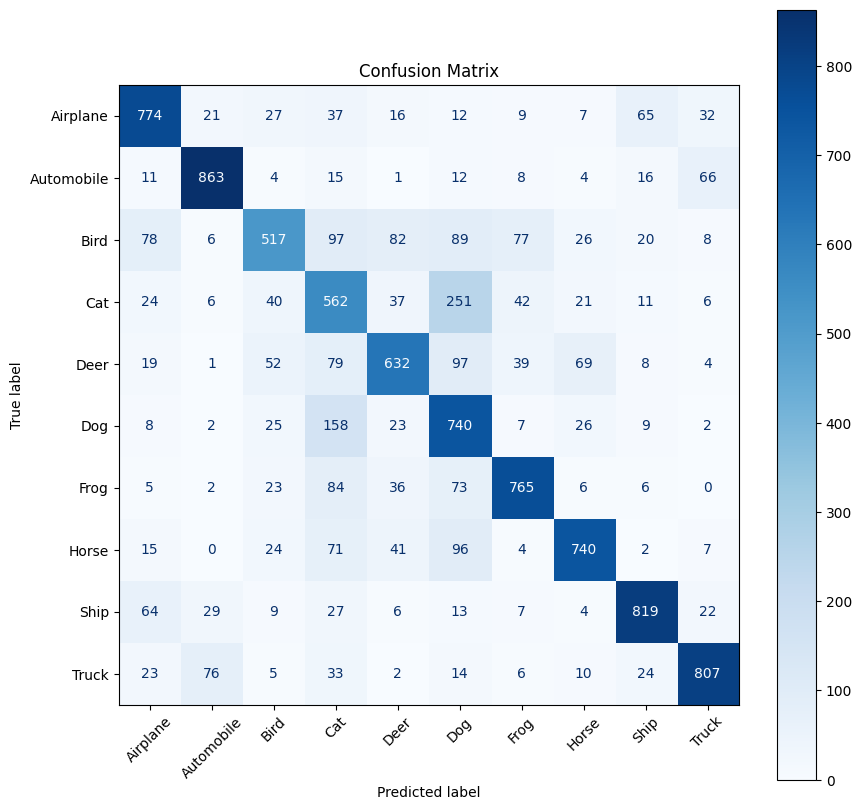

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_probs = model.predict(x_test)  # shape: (10000, 10)
y_pred = np.argmax(y_pred_probs, axis=1)  # shape: (10000,)
y_true = np.argmax(y_test, axis=1)        # shape: (10000,)
# Get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using sklearn
labels = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

- An activation function is a mathematical function applied to each neuron’s output that introduces:
    - Non Linearity into the network
    - Learn and represents complex relationships

2 - Key Differences between sigmoid and softmax:

- Sigmoid:
    - Maps input to a value between 0 and 1.
    - Good for a single class probability (binary classification)
    - Each neuron acts independtly
    - Binary Classification

- Softmax:
    - Outputs a probability distribution over multiple classes.
    - Ensures all probabilities sum to 1 — good for multi-class classification (e.g., cat, dog, horse).
    - each output depends on all other outputs
    - Multiclass Classification

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
- Categorical Crossentropy:
    - Multiclass classification
    - One-hot encoded vector, shape: (batch_size, n_classes) or (batch_size, 1)
    - Only one class active at a time
    - Softmax Activation function is used

- Binary Crossentropy:
    - Binary or Multi Layered
    - o or 1 label format, shape:(batch_size, n_classes)
    - Multi layered classification
    - SIgmoid Activation function is used